Energies for the bound states are: 
Energies from the analyitical model are: 
Symmetrical case
%.4f 0.9178704776435763
%.4f 8.092150551165636
%.4f 19.972582925556583
(Antisymmetrical case)
%.4f 3.646200788218426
%.4f 14.00216028337388


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


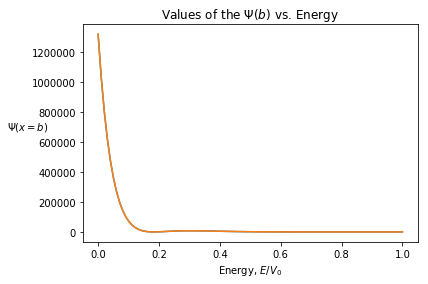

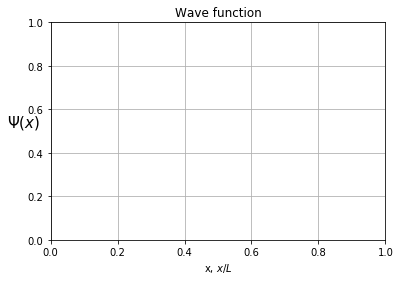

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


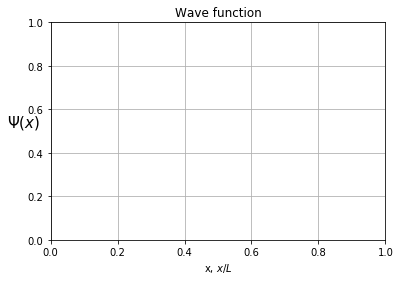

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import brentq

def V(x):
    L = 1
    if abs(x) > L:
        return 0
    else:
        return Vo
    
def SE(psi, x):
    state0 = psi[1]
    state1 = 2 * (V(x) - E) * psi[0]
    
    return [state0,state1]

def Wave_function(energy):
    global psi
    global E
    
    E = energy
    psi = odeint(SE, psi0, x)
    
    return psi[-1,0]

def find_all_zeroes(x,y):
    all_zeroes = []
    s = sign(y)
    
    for i in range(len(y) - 1):
        if s[i] + s[i+1] == 0:
            zero = brentq(Wave_function, x[i], x[i+1])
            all_zeroes.append(zero)
    
    return all_zeroes

def find_analytic_energies(en):
    z = np.sqrt(2 * en)
    z0 = np.sqrt(2 * Vo)
    z_zeroes = []
    f_sym = lambda z: np.tan(z) - np.sqrt((z0 / z)**2 - 1)
    f_asym = lambda z: -1 / np.tan(z) - np.sqrt((z0 / z)**2 - 1)
    
    s = sign(f_sym(z))
    for i in range(len(s) - 1):
        if s[i] + s[i+1] == 0:
            zero = brentq(f_sym, z[i], z[i+1])
            z_zeroes.append(zero)
    
    print("Energies from the analyitical model are: ")
    print("Symmetrical case")
    
    for i in range(0, len(z_zeroes),2):   # discard z=(2n-1)pi/2 solutions cause that's where tan(z) is discontinous
        print("%.4f",(z_zeroes[i]**2/2))
        
    # Now for the asymmetrical
    z_zeroes = []
    s = sign(f_asym(z))
    for i in range(len(s)-1):   # find zeroes of this crazy function
       if s[i]+s[i+1] == 0:
           zero = brentq(f_asym, z[i], z[i+1])
           z_zeroes.append(zero)
    print("(Antisymmetrical case)")
    for i in range(0, len(z_zeroes),2):   # discard z=npi solutions cause that's where ctg(z) is discontinous
        print("%.4f", (z_zeroes[i]**2/2))

        
N = 1000                  # number of points to take
psi = np.zeros([N,2])     # Wave function values and its derivative (psi and psi')
psi0 = np.array([0,1])   # Wave function initial states
Vo = 20
E = 0.0                   # global variable Energy  needed for Sch.Eq, changed in function "Wave function"
b = 2                     # point outside of well where we need to check if the function diverges
x = np.linspace(-b, b, N)    #

en = np.linspace(0, Vo, 100)   # vector of energies where we look for the stable states
 
psi_b = []      # vector of wave function at x = b for all of the energies in en
for e1 in en:
    psi_b.append(Wave_function(e1))     # for each energy e1 find the the psi(x) at x = b
E_zeroes = find_all_zeroes(en, psi_b)   # now find the energies where psi(b) = 0 
 
    # Print energies for the bound states
print("Energies for the bound states are: ")
for E in E_zeroes:
    print("%.2f",E)
    # Print energies of each bound state from the analytical model
find_analytic_energies(en)   
 
    # Plot wave function values at b vs energy vector
plt.figure(1)
plt.plot(en/Vo,psi_b)
plt.title('Values of the $\Psi(b)$ vs. Energy')
plt.xlabel('Energy, $E/V_0$')
plt.ylabel('$\Psi(x = b)$', rotation='horizontal')
for E in E_zeroes:
    plt.plot(E/Vo, [0], 'go')
    plt.annotate("E = %.2f"%E, xy = (E/Vo, 0), xytext=(E/Vo, 30))
plt.grid()
plt.show()
 
    # Plot the wavefunctions for first 4 eigenstates
plt.figure(2)
for E in E_zeroes[0:4]:
    Wave_function(E)
    plt.plot(x, psi[:,0], label="E = %.2f"%E)
plt.legend(loc="upper right")
plt.title('Wave function')
plt.xlabel('x, $x/L$')
plt.ylabel('$\Psi(x)$', rotation='horizontal', fontsize = 15)
plt.grid()
plt.show()